In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

In [2]:
import tensorflow as tf

#Set the seed for TensorFlow
tf.random.set_seed(42)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
cd /content/drive/MyDrive/Mtech project/Noora

/content/drive/MyDrive/Mtech project/Noora


In [8]:
df = pd.read_csv('crop_yield.csv')

category_columns = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in category_columns:
    df[col] = label_encoder.fit_transform(df[col])

X = df.drop(['Yield','Crop_Year'], axis=1)
y = df['Yield']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pt = PowerTransformer(method='yeo-johnson')

x_train_transform = pt.fit_transform(x_train)
x_test_transform = pt.transform(x_test)

# MLP

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, GRU, Conv1D, MaxPooling1D

# Multi-Layer Perceptron (MLP) Model
mlp_model = Sequential()
mlp_model.add(Dense(64, activation='relu', input_shape=(x_train_transform.shape[1],)))
#mlp_model.add(Dense(64, activation='relu'))
mlp_model.add(Dense(32, activation='relu'))
mlp_model.add(Dense(1, activation='linear'))
mlp_model.compile(optimizer='adam', loss='mean_squared_error')

history_mlp = mlp_model.fit(x_train_transform, y_train, epochs=100, batch_size=32, validation_data=(x_test_transform, y_test), verbose=2)


Epoch 1/100
493/493 - 2s - loss: 753130.7500 - val_loss: 749876.5625 - 2s/epoch - 4ms/step
Epoch 2/100
493/493 - 1s - loss: 664743.1250 - val_loss: 655860.1875 - 1s/epoch - 2ms/step
Epoch 3/100
493/493 - 1s - loss: 561709.5000 - val_loss: 548606.3750 - 869ms/epoch - 2ms/step
Epoch 4/100
493/493 - 1s - loss: 461121.2188 - val_loss: 464462.7188 - 1s/epoch - 2ms/step
Epoch 5/100
493/493 - 1s - loss: 387313.8438 - val_loss: 406096.4062 - 886ms/epoch - 2ms/step
Epoch 6/100
493/493 - 1s - loss: 326327.4062 - val_loss: 347725.7188 - 867ms/epoch - 2ms/step
Epoch 7/100
493/493 - 1s - loss: 268385.7500 - val_loss: 288407.3750 - 1s/epoch - 2ms/step
Epoch 8/100
493/493 - 1s - loss: 216240.2656 - val_loss: 237149.9531 - 1s/epoch - 2ms/step
Epoch 9/100
493/493 - 1s - loss: 174914.0781 - val_loss: 198363.7188 - 1s/epoch - 3ms/step
Epoch 10/100
493/493 - 1s - loss: 141413.2344 - val_loss: 166605.3594 - 1s/epoch - 3ms/step
Epoch 11/100
493/493 - 1s - loss: 116074.3359 - val_loss: 142015.1875 - 1s/epoch

Epoch with the best validation loss: 98
Validation loss at the best epoch: 21014.521484375
Training loss at the best epoch: 15839.568359375
124/124 [==============================] - 0s 1ms/step
Test Loss: 21978.888671875
Mean Squared Error: 21978.89193300358
Mean Absolute Error: 14.476040223912952
R-squared: 0.9725688986586778


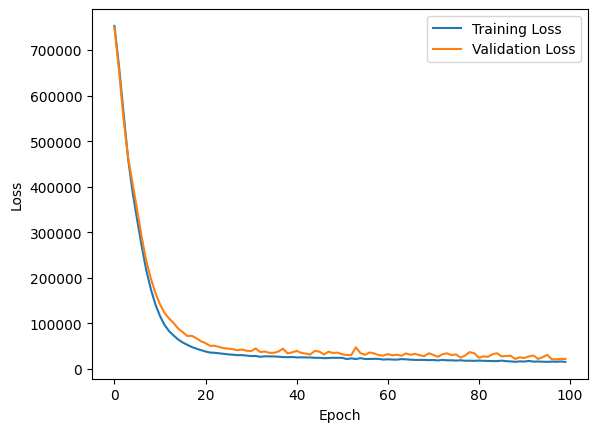

In [10]:
val_loss = history_mlp.history['val_loss']
best_epoch_index = np.argmin(val_loss)

print("Epoch with the best validation loss:", best_epoch_index + 1)  # Add 1 for human-readable 1-based indexing

# If desired, calculate and print other metrics at the best epoch
best_val_loss = val_loss[best_epoch_index]
best_train_loss = history_mlp.history['loss'][best_epoch_index]

print("Validation loss at the best epoch:", best_val_loss)
print("Training loss at the best epoch:", best_train_loss)

test_loss = mlp_model.evaluate(x_test_transform, y_test, verbose=0)
predictions=mlp_model.predict(x_test_transform)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Test Loss: {test_loss}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

plt.plot(history_mlp.history['loss'], label='Training Loss')
plt.plot(history_mlp.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# CNN

Epoch 1/100
247/247 - 5s - loss: 764022.1875 - val_loss: 787231.9375 - 5s/epoch - 21ms/step
Epoch 2/100
247/247 - 1s - loss: 731382.1875 - val_loss: 749531.0625 - 1s/epoch - 4ms/step
Epoch 3/100
247/247 - 1s - loss: 685987.3125 - val_loss: 699736.8125 - 1s/epoch - 4ms/step
Epoch 4/100
247/247 - 1s - loss: 632564.8125 - val_loss: 645586.0000 - 1s/epoch - 5ms/step
Epoch 5/100
247/247 - 1s - loss: 575390.5625 - val_loss: 591072.8125 - 1s/epoch - 6ms/step
Epoch 6/100
247/247 - 1s - loss: 518448.0625 - val_loss: 538841.6250 - 1s/epoch - 5ms/step
Epoch 7/100
247/247 - 1s - loss: 471597.1875 - val_loss: 499430.0312 - 1s/epoch - 5ms/step
Epoch 8/100
247/247 - 1s - loss: 434278.2500 - val_loss: 467719.0312 - 1s/epoch - 4ms/step
Epoch 9/100
247/247 - 2s - loss: 406542.0000 - val_loss: 443080.7812 - 2s/epoch - 7ms/step
Epoch 10/100
247/247 - 2s - loss: 381804.2188 - val_loss: 421720.1875 - 2s/epoch - 8ms/step
Epoch 11/100
247/247 - 2s - loss: 359867.7188 - val_loss: 401224.0625 - 2s/epoch - 6ms/s

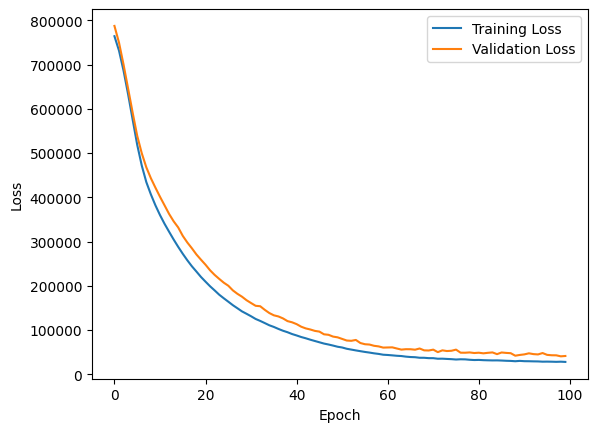

In [11]:
x_train_cnn = x_train_transform.reshape(x_train_transform.shape[0], x_train_transform.shape[1], 1)
x_test_cnn = x_test_transform.reshape(x_test_transform.shape[0], x_test_transform.shape[1], 1)
# Convolutional Neural Network (CNN) Model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(x_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1, activation='linear'))
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

history_cnn = cnn_model.fit(x_train_cnn, y_train, epochs=100, batch_size=64, validation_data=(x_test_cnn, y_test), verbose=2)

test_loss = cnn_model.evaluate(x_test_cnn, y_test, verbose=0)
predictions=cnn_model.predict(x_test_transform)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Test Loss: {test_loss}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('cnn.jpg')
plt.show()

# GRU

Epoch 1/100
493/493 - 5s - loss: 749325.5000 - val_loss: 738704.6250 - 5s/epoch - 10ms/step
Epoch 2/100
493/493 - 3s - loss: 668335.8125 - val_loss: 689743.7500 - 3s/epoch - 5ms/step
Epoch 3/100
493/493 - 3s - loss: 601856.5000 - val_loss: 588426.5000 - 3s/epoch - 5ms/step
Epoch 4/100
493/493 - 5s - loss: 558162.1250 - val_loss: 470445.2188 - 5s/epoch - 11ms/step
Epoch 5/100
493/493 - 3s - loss: 382720.9375 - val_loss: 658666.5000 - 3s/epoch - 7ms/step
Epoch 6/100
493/493 - 3s - loss: 267310.6250 - val_loss: 213879.0000 - 3s/epoch - 5ms/step
Epoch 7/100
493/493 - 3s - loss: 200603.6719 - val_loss: 164644.5938 - 3s/epoch - 5ms/step
Epoch 8/100
493/493 - 3s - loss: 126986.8281 - val_loss: 149140.6719 - 3s/epoch - 6ms/step
Epoch 9/100
493/493 - 4s - loss: 418152.8750 - val_loss: 125147.1406 - 4s/epoch - 8ms/step
Epoch 10/100
493/493 - 3s - loss: 86197.1484 - val_loss: 78824.5938 - 3s/epoch - 5ms/step
Epoch 11/100
493/493 - 3s - loss: 82976.1250 - val_loss: 74561.2109 - 3s/epoch - 5ms/step

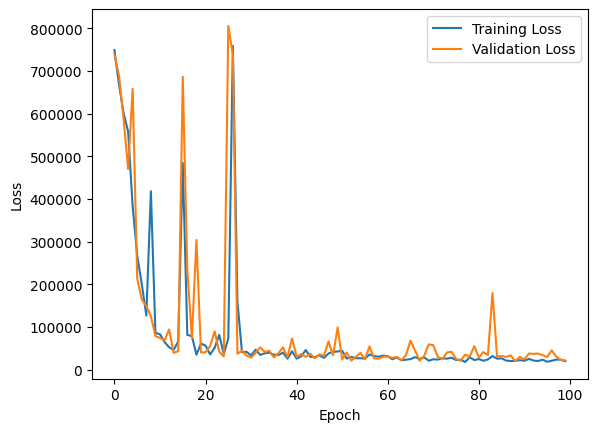

In [12]:

x_train_gru = x_train_transform.reshape(x_train_transform.shape[0], x_train_transform.shape[1], 1)
x_test_gru = x_test_transform.reshape(x_test_transform.shape[0], x_test_transform.shape[1], 1)

# Gated Recurrent Unit (GRU) Model
gru_model = Sequential()
gru_model.add(GRU(50, activation='relu', input_shape=(x_train_gru.shape[1], 1)))
gru_model.add(Dense(1, activation='linear'))
gru_model.compile(optimizer='adam', loss='mean_squared_error')


history_gru = gru_model.fit(x_train_gru, y_train, epochs=100, batch_size=32, validation_data=(x_test_gru, y_test), verbose=2)

test_loss = gru_model.evaluate(x_test_gru, y_test, verbose=0)
predictions=gru_model.predict(x_test_transform)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Test Loss: {test_loss}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

plt.plot(history_gru.history['loss'], label='Training Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('gru.jpg')
plt.show()

# LSTM

Epoch 1/100
493/493 - 5s - loss: 735374.5625 - val_loss: 735841.7500 - 5s/epoch - 9ms/step
Epoch 2/100
493/493 - 3s - loss: 644858.4375 - val_loss: 762170.6250 - 3s/epoch - 5ms/step
Epoch 3/100
493/493 - 4s - loss: 499651.4062 - val_loss: 948539.3125 - 4s/epoch - 7ms/step
Epoch 4/100
493/493 - 3s - loss: 477793.0000 - val_loss: 392229.3750 - 3s/epoch - 6ms/step
Epoch 5/100
493/493 - 3s - loss: 306455.2812 - val_loss: 270269.5938 - 3s/epoch - 5ms/step
Epoch 6/100
493/493 - 3s - loss: 265634.3438 - val_loss: 205705.6562 - 3s/epoch - 6ms/step
Epoch 7/100
493/493 - 3s - loss: 186567.5312 - val_loss: 179971.0938 - 3s/epoch - 6ms/step
Epoch 8/100
493/493 - 4s - loss: 238706.0469 - val_loss: 612611.6250 - 4s/epoch - 8ms/step
Epoch 9/100
493/493 - 3s - loss: 209184.2812 - val_loss: 104312.2812 - 3s/epoch - 5ms/step
Epoch 10/100
493/493 - 3s - loss: 72245.8828 - val_loss: 73979.7188 - 3s/epoch - 6ms/step
Epoch 11/100
493/493 - 3s - loss: 178709.1719 - val_loss: 107566.1797 - 3s/epoch - 6ms/step

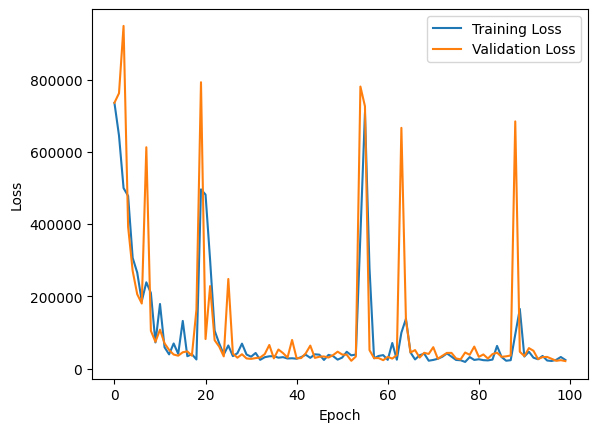

In [15]:
# Reshape for LSTM
x_train_lstm = x_train_transform.reshape(x_train_transform.shape[0], x_train_transform.shape[1], 1)
x_test_lstm = x_test_transform.reshape(x_test_transform.shape[0], x_test_transform.shape[1], 1)

# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(x_train_lstm.shape[1], 1)))
lstm_model.add(Dense(1, activation='linear'))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
history_lstm = lstm_model.fit(x_train_lstm, y_train, epochs=100, batch_size=32, validation_data=(x_test_lstm, y_test), verbose=2)

# Evaluate the model
test_loss = lstm_model.evaluate(x_test_lstm, y_test, verbose=0)
predictions = lstm_model.predict(x_test_lstm)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print evaluation metrics
print(f'Test Loss: {test_loss}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plot training history
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('lstm.jpg')
plt.show()
